# Orderbook imbalance heatmap chart

In [1]:
import numpy as np
from simple.plotly import chartFigure
from simple.funcs import symlog, Ratio, tickSpeed
from simple.pretty import pmap
from functools import partial
import matplotlib.pyplot as plt

In [2]:
S = np.load('data/ETHUSDT.2022-05-08.snap.npz')['ETHUSDT'].view(np.recarray)
A, vA, B, vB = S.A.T, S.vA.T, S.B.T, S.vB.T

In [3]:
# indexed chart with bidask
fig = chartFigure(rows=2,
    Bid=dict(y=A[0], color='green'),
    Ask=dict(y=B[0], color='red'),
    Imb=dict(y=Ratio(vA, vB, 100), color='blue', row=2)
)
fig

FigureWidgetResampler({
    'data': [{'line': {'color': 'green'},
              'name': '<b style="color:sandy…

In [4]:
Imb = pmap(lambda level: Ratio(vA, vB, level)[::100], range(1, 100))

  0%|          | 0/99 [00:00<?, ?it/s]

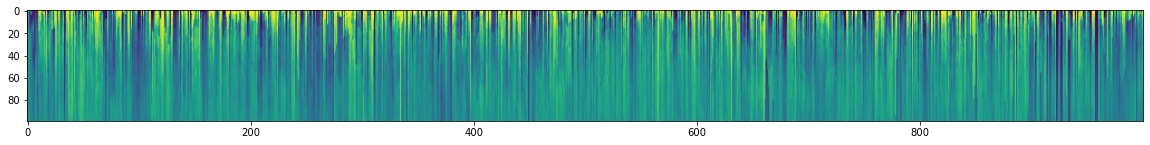

In [5]:
plt.figure(figsize=(20,5))
plt.imshow(Imb);